# This notebook will be EDA for genre research both domestic and foreign

### This section is the importing the packages and data. I also changed the display parameters so I won't lose out any of the columns when viewing the dataframes.

In [2]:
# first import all of the packages I need including plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set(style = 'darkgrid')
%matplotlib inline

In [3]:
# import the data into dataframes

df = pd.read_csv('../data/profit_data.csv')

pd.options.display.max_columns = None # this turns off the function that truncates the df view of columns
pd.options.display.max_rows = None # this turns off the function that truncates the df view of rows
#display(df)

### The next section will be creating custom columns that will be used in analysis

In [4]:
df['foreign_gross'] = df.worldwide_gross - df.domestic_gross # create a new column that estimates the revenue from international markets only

In [5]:
# creating bottom line profit columns

df['total_profit'] = df['worldwide_gross'] - df['production_budget']
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['foreign_profit'] = df['foreign_gross'] - df['production_budget']

In [6]:
# helpful ratios for gross revenue vs production budget

df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_for'] = df.foreign_gross/df.production_budget
df['rev2bud_wld'] = df.worldwide_gross/df.production_budget

In [7]:
# early attempts at separating genres that were supplied in long strings separated by commas

df['primary_genre'] = df.genres.str.split(',', n = 1, expand = True)[0]
df['secondary_genre'] = df.genres.str.split(',', n = 1, expand = True)[1]

df['primary_genre'].value_counts() # counting the amount of movies per genre

Action         391
Comedy         243
Drama          185
Adventure      146
Biography       95
Horror          65
Crime           63
Documentary      8
Animation        6
Fantasy          5
Mystery          3
Thriller         2
Romance          1
Family           1
Sci-Fi           1
Name: primary_genre, dtype: int64

### Now I create dataframes based on the genre appearing either in the primary genre listed or the secondary genre listed

In [8]:
# creating dataframes based on primary genre for easier call back

horror_df = df[(df['primary_genre'] == 'Horror')]
action_df = df[(df['primary_genre'] == 'Action')]
drama_df = df[(df['primary_genre'] == 'Drama')]
advent_df = df[df['primary_genre'] == 'Adventure']
comedy_df = df[(df['primary_genre'] == 'Comedy')]
bio_df = df[(df['primary_genre'] == 'Biography')]


### This is the beginning of the plots.

#### This is a plot of the ratio of revenue to budget for worldwide gross by genre

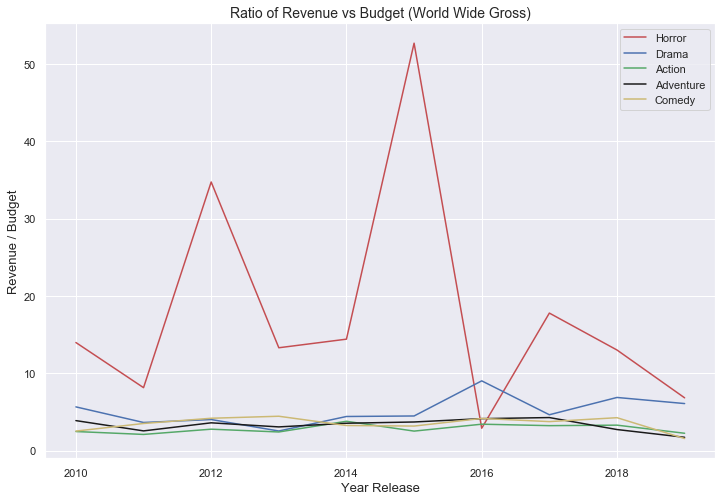

In [73]:
# basic line graph showing the worldwide gross from 2010 - 2019

y1 = horror_df.groupby(['year'])['rev2bud_wld'].mean()
x1 = y1.index

y2 = drama_df.groupby(['year'])['rev2bud_wld'].mean()
x2 = y2.index

y3 = action_df.groupby(['year'])['rev2bud_wld'].mean()
x3 = y3.index

y4 = advent_df.groupby(['year'])['rev2bud_wld'].mean()
x4 = y4.index

y5 = comedy_df.groupby(['year'])['rev2bud_wld'].mean()
x5 = y5.index
plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Horror') # plotting Horror separately 
plt.plot(x2, y2, 'b', label = 'Drama') # plotting Drama separately 
plt.plot(x3, y3, 'g', label = 'Action') # plotting Action separately 
plt.plot(x4, y4, 'k', label = 'Adventure') # plotting adventure separately 
plt.plot(x5, y5, 'y', label = 'Comedy') # plotting comedy separately 

plt.legend()

plt.title('Ratio of Revenue vs Budget (World Wide Gross)', fontsize = 14)
plt.ylabel('Revenue / Budget', fontsize = 13)
plt.xlabel('Year Release', fontsize = 13)
plt.show()

#### This is a plot of the total profits worldwide by genre of the top 3 earning genres

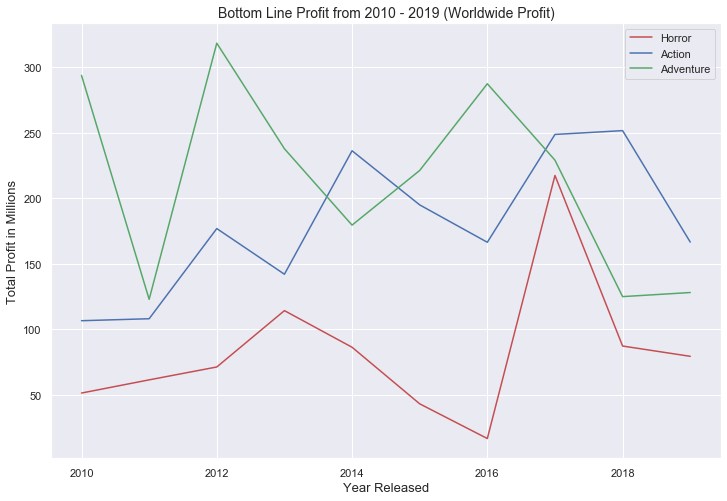

In [72]:
# top 3 genres but with the assumed bottom line profits. Access README.md for more infomation about bottom line profits

y1 = horror_df.groupby(['year'])['total_profit'].mean()
x1 = y1.index

y2 = action_df.groupby(['year'])['total_profit'].mean()
x2 = y2.index

y3 = advent_df.groupby(['year'])['total_profit'].mean()
x3 = y3.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Horror') # plotting horror separately 
plt.plot(x2, y2, 'b', label = 'Action') # plotting action separately 
plt.plot(x3, y3, 'g', label = 'Adventure') # plotting adventure separately 


#they are all combined on the final graph
plt.legend(loc = 'best')

plt.title('Bottom Line Profit from 2010 - 2019 (Worldwide Profit)', fontsize = 14)
plt.ylabel('Total Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

## This is a time series of the total profit of the genres 4-6 of top 6 earning genres

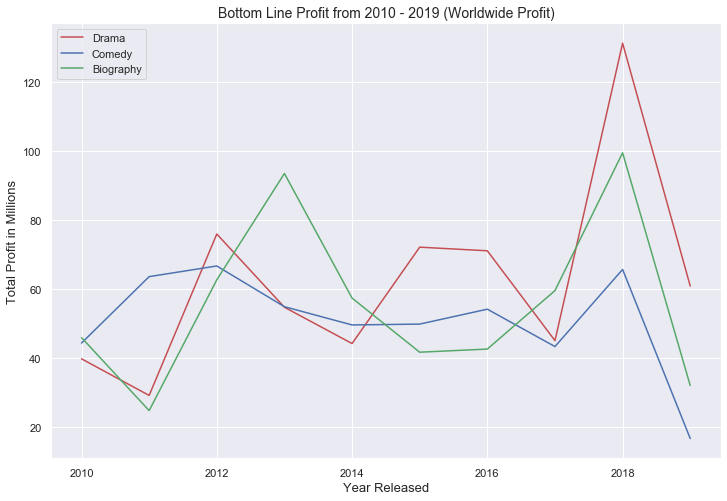

In [56]:
# they were scaled differently than the top 3 so these genres were done on their own

y1 = drama_df.groupby(['year'])['total_profit'].mean()
x1 = y1.index

y2 = comedy_df.groupby(['year'])['total_profit'].mean()
x2 = y2.index

y3 = bio_df.groupby(['year'])['total_profit'].mean()
x3 = y3.index

plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Drama') # plotting horror separately 
plt.plot(x2, y2, 'b', label = 'Comedy') # plotting drama separately 
plt.plot(x3, y3, 'g', label = 'Biography') # plotting action separately 


#they are all combined on the final graph
plt.legend(loc = 'best')

plt.title('Bottom Line Profit from 2010 - 2019 (Worldwide Profit)', fontsize = 14)
plt.ylabel('Total Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

#### The spike in 2017 for horror movies was due to a much anticipated reboot ("It")

### This is a distribution plot about the revenue to cost ratio for Action movies worldwide

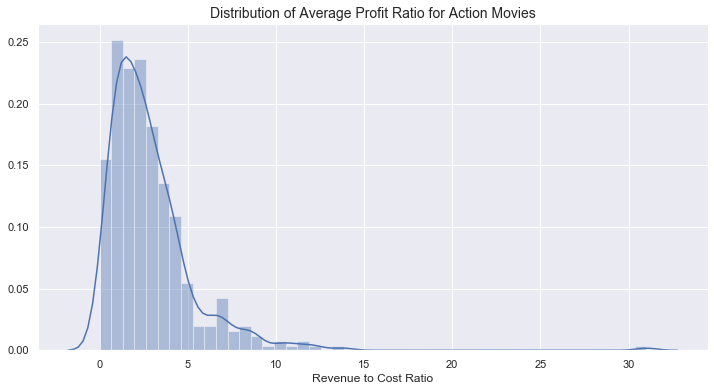

In [13]:
# distribution of action movies on a scale of budget recuperation 

Y = action_df.rev2bud_wld.dropna().sort_values()

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot( Y, ax = ax)


#sns.barplot(x = "names", y = "values", ax=ax, data=df)

plt.title("Distribution of Average Profit Ratio for Action Movies", fontsize = 14)
plt.xlabel("Revenue to Cost Ratio", fontsize = 12)

plt.show()

### This is a distribution plot about the revenue to cost ratio for Horror movies worldwide

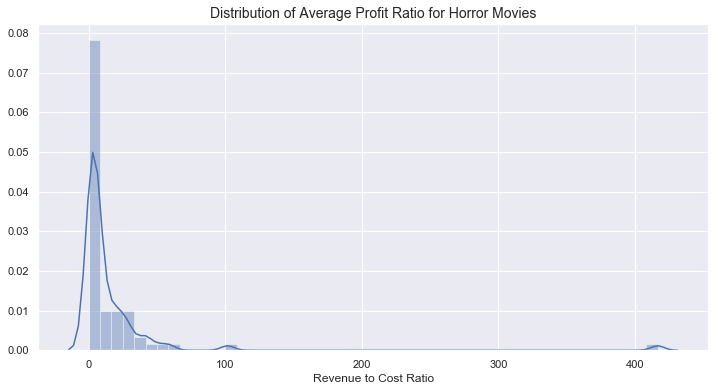

In [14]:
Y = horror_df.rev2bud_wld.dropna().sort_values()

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot( Y, ax = ax)


#sns.barplot(x = "names", y = "values", ax=ax, data=df)

plt.title("Distribution of Average Profit Ratio for Horror Movies", fontsize = 14)
plt.xlabel("Revenue to Cost Ratio", fontsize = 12)

plt.show()

##### The large spike shows the majority of the movies lands within the center distribution. However, there are a few outliers that skew the graph to the right.

### The next plot is a side by side comparison of the world and domestic gross. For three genres...

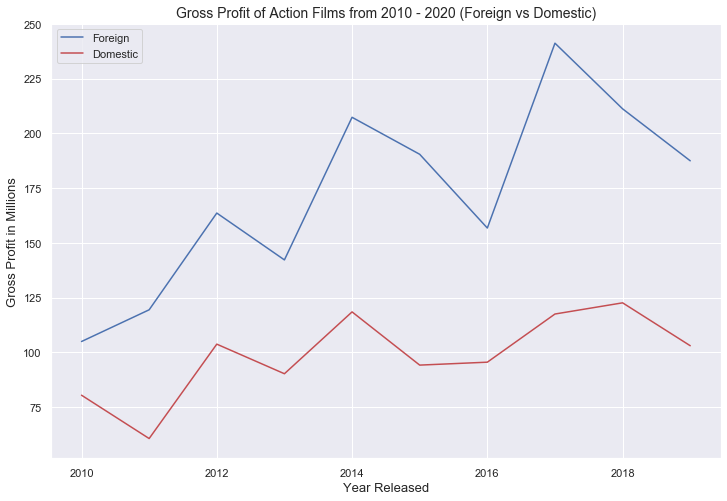

In [15]:
y1 = action_df.groupby(['year'])['foreign_gross'].mean()
x1 = y1.index

y2 = action_df.groupby(['year'])['domestic_gross'].mean()
x2 = y2.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'b', label = 'Foreign') # plotting foreign separately 
plt.plot(x2, y2, 'r', label = 'Domestic') # plotting domestic separately 

#they are all combined on the final graph
plt.legend(loc = 'upper left')

plt.title('Gross Profit of Action Films from 2010 - 2020 (Foreign vs Domestic)', fontsize = 14)
plt.ylabel('Gross Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

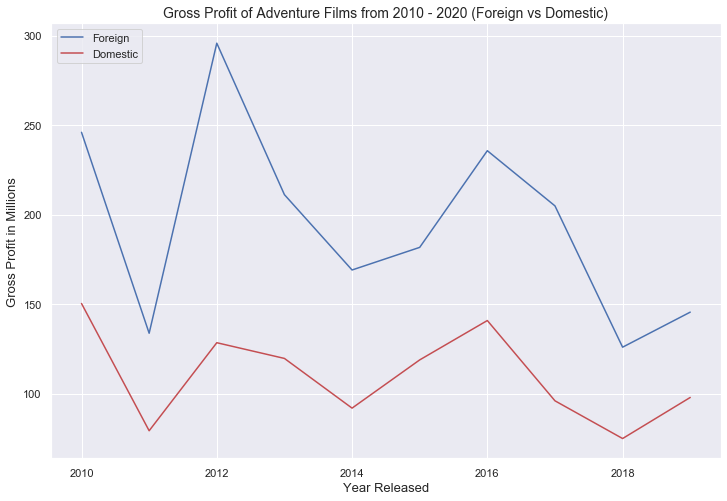

In [79]:
y1 = advent_df.groupby(['year'])['foreign_gross'].mean()
x1 = y1.index

y2 = advent_df.groupby(['year'])['domestic_gross'].mean()
x2 = y2.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'b', label = 'Foreign') # plotting foreign separately 
plt.plot(x2, y2, 'r', label = 'Domestic') # plotting domestic separately 

#they are all combined on the final graph
plt.legend(loc = 'upper left')

plt.title('Gross Profit of Adventure Films from 2010 - 2020 (Foreign vs Domestic)', fontsize = 14)
plt.ylabel('Gross Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

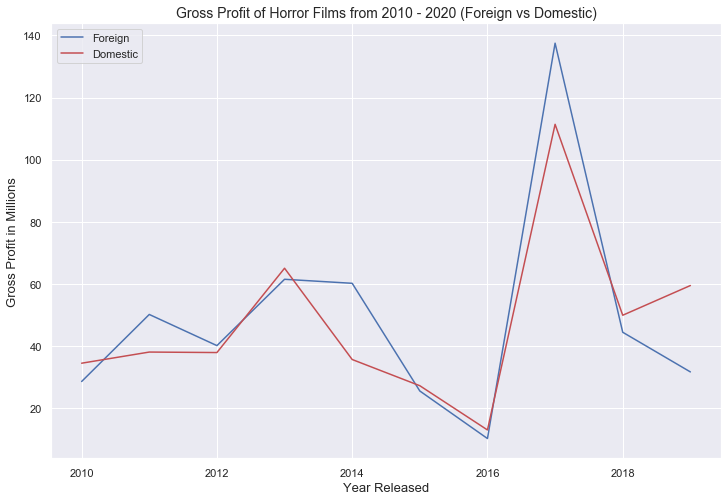

In [78]:
y1 = horror_df.groupby(['year'])['foreign_gross'].mean()
x1 = y1.index

y2 = horror_df.groupby(['year'])['domestic_gross'].mean()
x2 = y2.index


plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'b', label = 'Foreign') # plotting foreign separately 
plt.plot(x2, y2, 'r', label = 'Domestic') # plotting domestic separately 

#they are all combined on the final graph
plt.legend(loc = 'upper left')

plt.title('Gross Profit of Horror Films from 2010 - 2020 (Foreign vs Domestic)', fontsize = 14)
plt.ylabel('Gross Profit in Millions', fontsize = 13)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

### The film "Coco" analysis

In [9]:
coco_df = df[(df.title == 'coco') & (df.primary_genre == 'Adventure')]
coco_df

,Unnamed: 0,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,month,studio,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers,foreign_gross,total_profit,domestic_profit,foreign_profit,rev2bud_dom,rev2bud_for,rev2bud_wld,primary_genre,secondary_genre
1015,2331,32.919,11629,354912,False,en,coco,8.2,Despite his family’s baffling generations-old ...,PG,2017,10,BV,175.0,209.73,798.01,tt2380307,coco,Coco,2017,105.0,"Adventure,Animation,Comedy",8.4,277194,"Gael García Bernal,Alanna Ubach,Benjamin Bratt...","Adrian Molina,Lee Unkrich",Darla K. Anderson,NaN,"Jason Katz,Matthew Aldrich",588.28,623.01,34.73,413.28,1.198457,3.3616,4.560057,Adventure,"Animation,Comedy"


##### The information seems to point to a large increase in success overseas

# Coco foreign vs domestic

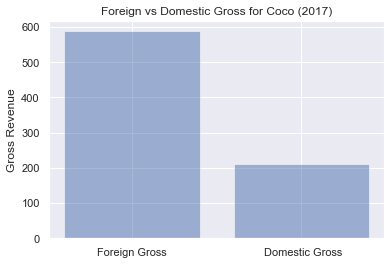

In [18]:
foreign = coco_df.foreign_gross.values[0] 
domestic = coco_df.domestic_gross.values[0]
index = ['Foreign Gross',' Domestic Gross']



plt.bar(x = index, height = [foreign, domestic], align='center', alpha=0.5)
#plt.xticks(y_pos, index)
plt.ylabel('Gross Revenue')
plt.title('Foreign vs Domestic Gross for Coco (2017)')

plt.show()

### Linear Regressions for each genre specifically domestic, this seems to be visually unappealing and hard to decipher

In [ ]:
# this concatenation allows for the linear regression seen below

all_df = pd.concat('enter list of df names here')


In [ ]:
ax = sns.boxplot(x="title", y="worldwide_gross_z", data=all_df)

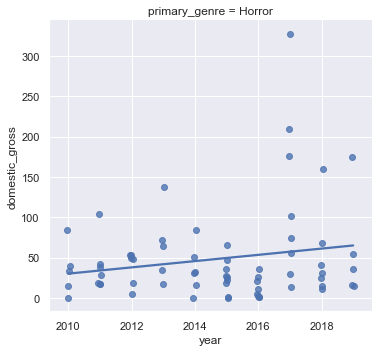

In [77]:
sns.lmplot(x="year", y="domestic_gross", col="primary_genre", hue="primary_genre", data=all_df,
           col_wrap=2, ci=None, x_jitter=.05, y_jitter=.03, truncate = True);

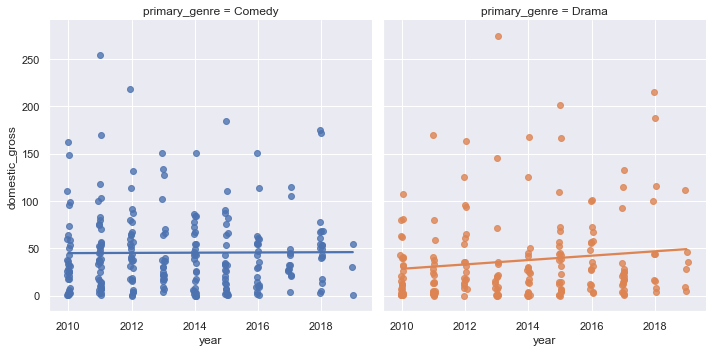

In [50]:
sns.lmplot(x="year", y="domestic_gross", col="primary_genre", hue="primary_genre", data=last_df,
           col_wrap=2, ci=None, x_jitter=.05, y_jitter=.03, truncate = True);
plt.show()

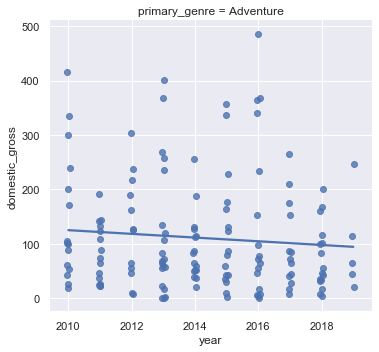

In [51]:
sns.lmplot(x="year", y="domestic_gross", col="primary_genre", hue="primary_genre", data=advent_df,
           col_wrap=2, ci=None, x_jitter=.05, y_jitter=.03, truncate = True, scatter = True);

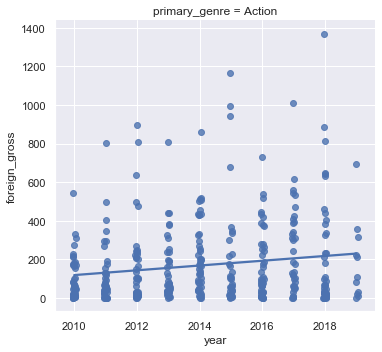

In [52]:
sns.lmplot(x="year", y="foreign_gross", col="primary_genre", hue="primary_genre", data=action_df,
           col_wrap=2, ci=None, x_jitter=.05, y_jitter=.03, truncate = True, scatter = True);